In [1]:
# For auto-reloading external modules see
# http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import numpy
import observations.dimensions.two.sampling as observe
import matplotlib.pyplot as plt
import seaborn as sns

from defaults.plot import *

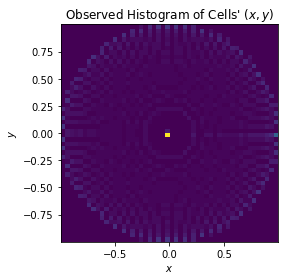

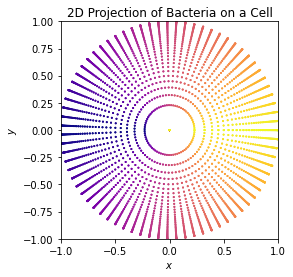

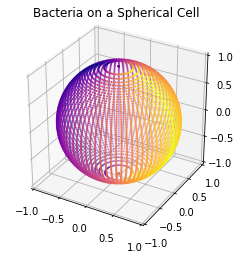

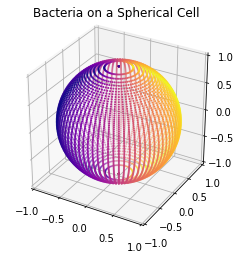

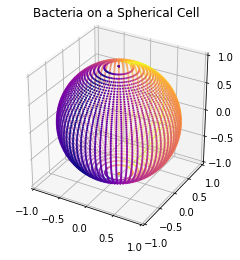

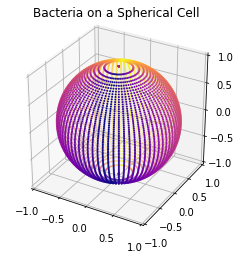

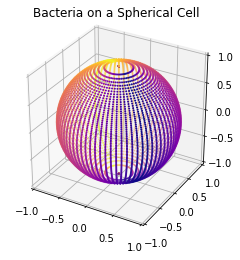

In [2]:
from math import pi, sin, cos, acos
from observations.dimensions.one.sampling import step_sample

samplesize = 75
# based on http://corysimon.github.io/articles/uniformdistn-on-sphere/
# or https://mathworld.wolfram.com/SpherePointPicking.html
# or https://www.bogotobogo.com/Algorithms/uniform_distribution_sphere.php
thetas = numpy.array([step_sample(i, 0, 2 * pi, samplesize) for i in range(samplesize + 1)]).reshape(-1, 1)
phis = numpy.array([acos(step_sample(i, -1, 1, samplesize)) for i in range(samplesize + 1)]).reshape(-1, 1)

def numpy_spherical_to_cartesian(arr):
    def helper(arr):
        theta = arr[0]
        phi = arr[1]
        return [sin(phi) * cos(theta), sin(phi) * sin(theta), cos(phi)]

    return numpy.apply_along_axis(helper, 1, arr)

spherical_points = numpy.array(numpy.meshgrid(thetas, phis)).T.reshape(-1, 2)
cartesian_points = numpy_spherical_to_cartesian(spherical_points)
colors = numpy.abs(spherical_points[:, 0] - pi)

# TODO: this figure was created with 500 sample points, bins = 70
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')
plt.title(r"Observed Histogram of Cells' $\left(x,y\right)$")
plt.hist2d(cartesian_points[:,0], cartesian_points[:,1], bins=50, rasterized=True)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout()
plt.savefig("figures/bacteria/density.pdf", dpi=dpi*2/3)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')
plt.scatter(cartesian_points[:,0], cartesian_points[:,1], s=1, c=colors, cmap='plasma', rasterized=True)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("2D Projection of Bacteria on a Cell", y=0.995)
plt.savefig("figures/bacteria/cell2d.pdf", dpi=dpi*2/3)
plt.show()

delta = 2 * pi / 10
for i in range(5):
    new_theta = (thetas + i * delta) % (2 * pi)
    spherical_points = numpy.array(numpy.meshgrid(new_theta, phis)).T.reshape(-1, 2)
    cartesian_points = numpy_spherical_to_cartesian(spherical_points)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect((numpy.ptp(cartesian_points[:,0]), numpy.ptp(cartesian_points[:,1]), numpy.ptp(cartesian_points[:,2])))
    ax.scatter(cartesian_points[:,0], cartesian_points[:,1], cartesian_points[:,2], s=1, c=colors, cmap='plasma', rasterized=True)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    plt.title("Bacteria on a Spherical Cell", y=1.05)
    plt.savefig("figures/bacteria/cell.pdf", dpi=dpi*2/3)
    plt.show()

In [29]:
delta = 2 * pi / 10
samplesize = 150
thetas0 = numpy.array([step_sample(i, 0, 2 * pi, samplesize) for i in range(samplesize + 1)]).reshape(-1, 1)
thetas1 = (thetas0 + delta) % (2 * pi)
thetas2 = (thetas0 + 2 * delta) % (2 * pi)
thetas3 = (thetas0 + 3 * delta) % (2 * pi)
thetas4 = (thetas0 + 4 * delta) % (2 * pi)
phis = numpy.array([acos(step_sample(i, 0, 2, samplesize) - 1) for i in range(samplesize + 1)]).reshape(-1, 1)

cartesian_points0 = numpy_spherical_to_cartesian(numpy.array(numpy.meshgrid(thetas0, phis)).T.reshape(-1, 2))
cartesian_points1 = numpy_spherical_to_cartesian(numpy.array(numpy.meshgrid(thetas1, phis)).T.reshape(-1, 2))
cartesian_points2 = numpy_spherical_to_cartesian(numpy.array(numpy.meshgrid(thetas2, phis)).T.reshape(-1, 2))
cartesian_points3 = numpy_spherical_to_cartesian(numpy.array(numpy.meshgrid(thetas3, phis)).T.reshape(-1, 2))
cartesian_points4 = numpy_spherical_to_cartesian(numpy.array(numpy.meshgrid(thetas4, phis)).T.reshape(-1, 2))

measurements = cartesian_points0[:,[0,1]]
measurements = numpy.append(measurements, cartesian_points1[:,[0,1]], axis=1)
measurements = numpy.append(measurements, cartesian_points2[:,[0,1]], axis=1)
measurements = numpy.append(measurements, cartesian_points3[:,[0,1]], axis=1)
measurements = numpy.append(measurements, cartesian_points4[:,[0,1]], axis=1)

print(measurements)

[[ 1.22464680e-16  0.00000000e+00  9.90760073e-17 ...  1.16470832e-16
  -9.90760073e-17  7.19829328e-17]
 [ 1.62754075e-01  0.00000000e+00  1.31670812e-01 ...  1.54788323e-01
  -1.31670812e-01  9.56644450e-02]
 [ 2.29395340e-01  0.00000000e+00  1.85584729e-01 ...  2.18167933e-01
  -1.85584729e-01  1.34835198e-01]
 ...
 [ 2.29395340e-01 -5.61856539e-17  1.85584729e-01 ...  2.18167933e-01
  -1.85584729e-01  1.34835198e-01]
 [ 1.62754075e-01 -3.98632514e-17  1.31670812e-01 ...  1.54788323e-01
  -1.31670812e-01  9.56644450e-02]
 [ 0.00000000e+00 -0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -0.00000000e+00  0.00000000e+00]]


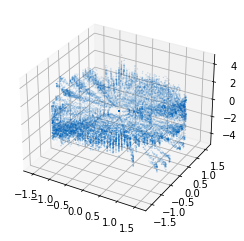

In [30]:
from sklearn.preprocessing import StandardScaler
measurements_scaler = StandardScaler()
measurements_scaled = measurements_scaler.fit_transform(measurements)

from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'full')
pca.n_components = 3

#%TODO: standardize measurmenets before?
data = pca.fit_transform(measurements_scaled)[2:]
measurements = measurements[2:]

pca_scaler = StandardScaler()
measurements_fit = pca_scaler.fit_transform(data)
#TODO: why this??
measurements_fit = measurements_fit

# todo color based on theta

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(measurements_fit[:,0], measurements_fit[:,1], measurements_fit[:,2], s=0.01, cmap='cividis', rasterized=True)
plt.show()

In [31]:
%%time

import torch
import flows.utils

pca_flow_dist, pca_transform = flows.utils.normalnd_to_samples(measurements_fit, 3, count_bins=32, normalize=True, steps=2001)
pca_samples = pca_flow_dist.sample(torch.Size([samplesize**2])).detach().numpy()

step: 0, loss: 6.424846172332764


KeyboardInterrupt: 

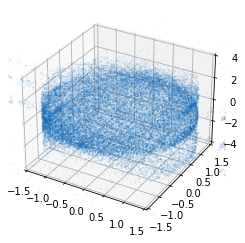

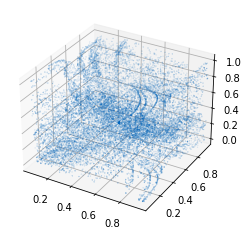

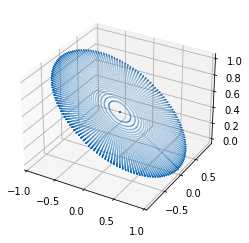

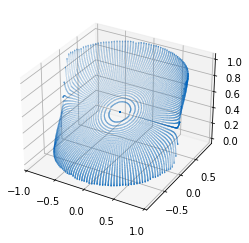

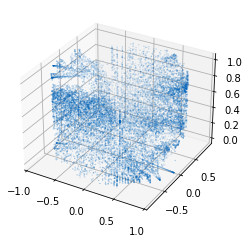

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_samples[:,0], pca_samples[:,1], pca_samples[:,2], s=0.01, cmap='cividis', rasterized=True)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-4, 4)
plt.show()
from scipy.stats import norm

uniform_space = norm.cdf(pca_transform.inv(torch.tensor(measurements_fit, dtype=torch.float)).detach().numpy())
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(uniform_space[:,0], uniform_space[:,1], uniform_space[:,2], s=0.01, cmap='cividis', rasterized=True)
plt.show()

for i in range(3):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(measurements[:,0], measurements[:,1], uniform_space[:,i], s=0.01, cmap='cividis', rasterized=True)
    plt.show()

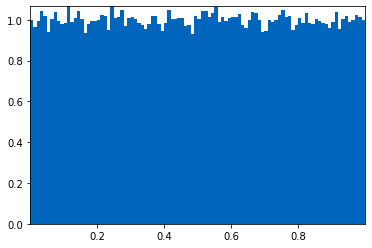

In [33]:
plt.hist(norm.cdf(numpy.random.normal(0, 1, 100000)), bins=100, density=True)
plt.show()

In [34]:
from scipy.special import erfinv
Gauss = lambda x, mu, sigma: mu + numpy.sqrt(2)*sigma*erfinv(2*x-1)
standard_gauss = numpy.vectorize(lambda x: Gauss((x + 1) / 2, 0, 1)) # multiple with 2 subtract one to transport -1 - 1 to -1, 1

def get_normal_points():
    x = numpy.linspace(-1, 1, 75)[1:-1]
    y = numpy.linspace(-1, 1, 75)[1:-1]
    z = numpy.linspace(-1, 1, 75)[1:-1]

    x_mesh, y_mesh, z_mesh = numpy.meshgrid(x, y, z)

    x_normal, y_normal, z_normal = numpy.meshgrid(standard_gauss(x), standard_gauss(y), standard_gauss(z))

    point_tuples = numpy.array((x_mesh, y_mesh, z_mesh)).reshape(3, -1).T
    return point_tuples, numpy.array((x_normal, y_normal, z_normal)).reshape(3, -1).T

point_tuples, normal_tuples = get_normal_points()

reconstructed_space = pca_transform(torch.tensor(normal_tuples, dtype=torch.float)).detach().numpy()
reconstructed_original_scaled = pca.inverse_transform(pca_scaler.inverse_transform(reconstructed_space))
reconstructed_original = measurements_scaler.inverse_transform(reconstructed_original_scaled)[:,[0,1]]

print(point_tuples)
print(reconstructed_original)

expanded_original = numpy.append(reconstructed_original, point_tuples[:,[0,1,2]], axis=1)

print(expanded_original)

[[-0.97297297 -0.97297297 -0.97297297]
 [-0.97297297 -0.97297297 -0.94594595]
 [-0.97297297 -0.97297297 -0.91891892]
 ...
 [ 0.97297297  0.97297297  0.91891892]
 [ 0.97297297  0.97297297  0.94594595]
 [ 0.97297297  0.97297297  0.97297297]]
[[ 0.99415003 -0.15140778]
 [ 0.99415003 -0.15140778]
 [ 0.99415003 -0.15140778]
 ...
 [-0.99712225  0.13162765]
 [-0.99712225  0.13162765]
 [-0.99712225  0.13162765]]
[[ 0.99415003 -0.15140778 -0.97297297 -0.97297297 -0.97297297]
 [ 0.99415003 -0.15140778 -0.97297297 -0.97297297 -0.94594595]
 [ 0.99415003 -0.15140778 -0.97297297 -0.97297297 -0.91891892]
 ...
 [-0.99712225  0.13162765  0.97297297  0.97297297  0.91891892]
 [-0.99712225  0.13162765  0.97297297  0.97297297  0.94594595]
 [-0.99712225  0.13162765  0.97297297  0.97297297  0.97297297]]


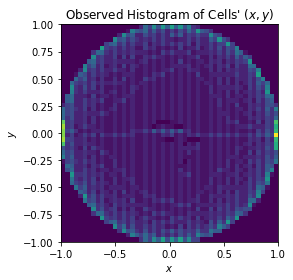

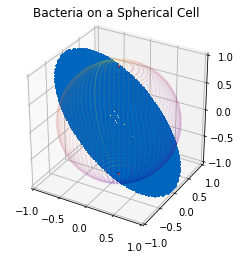

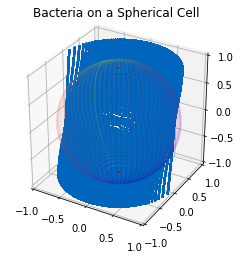

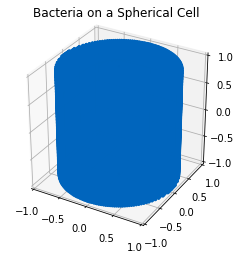

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')
plt.title(r"Observed Histogram of Cells' $\left(x,y\right)$")
plt.hist2d(expanded_original[:,0], expanded_original[:,1], bins=50, rasterized=True, range=numpy.array([(-1, 1), (-1, 1)]))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout()
#plt.savefig("figures/bacteria/density.pdf", dpi=dpi*2/3)
plt.show()

for i in range(2,5):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect((numpy.ptp(cartesian_points[:,0]), numpy.ptp(cartesian_points[:,1]), numpy.ptp(cartesian_points[:,2])))
    ax.scatter(cartesian_points[:,0], cartesian_points[:,1], cartesian_points[:,2], alpha=0.05, s=1, c=colors, cmap='plasma', rasterized=True)
    ax.scatter(expanded_original[:,0], expanded_original[:,1], expanded_original[:,i], s=1, cmap='plasma', rasterized=True)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    plt.title("Bacteria on a Spherical Cell", y=1.05)
    #plt.savefig("figures/bacteria/cell.pdf", dpi=dpi*2/3)
    plt.show()

In [36]:
print(measurements)
print(measurements_fit)
print(numpy.where(numpy.any(measurements_fit > 30, axis=1)))

[[ 2.29395340e-01  0.00000000e+00  1.85584729e-01 ...  2.18167933e-01
  -1.85584729e-01  1.34835198e-01]
 [ 2.80000000e-01  0.00000000e+00  2.26524758e-01 ...  2.66295825e-01
  -2.26524758e-01  1.64579871e-01]
 [ 3.22214559e-01  0.00000000e+00  2.60677054e-01 ...  3.06444256e-01
  -2.60677054e-01  1.89392966e-01]
 ...
 [ 2.29395340e-01 -5.61856539e-17  1.85584729e-01 ...  2.18167933e-01
  -1.85584729e-01  1.34835198e-01]
 [ 1.62754075e-01 -3.98632514e-17  1.31670812e-01 ...  1.54788323e-01
  -1.31670812e-01  9.56644450e-02]
 [ 0.00000000e+00 -0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -0.00000000e+00  0.00000000e+00]]
[[-3.88408131e-01  8.31439477e-17  2.11190610e-01]
 [-4.76061648e-01  8.98618126e-17  2.01894062e-01]
 [-5.49182475e-01  5.99868323e-17  3.37791747e-01]
 ...
 [-3.88408131e-01  7.75690846e-17 -2.60279994e-01]
 [-2.72977233e-01  6.09748809e-17 -1.19562198e-01]
 [ 8.93291459e-03  6.52597632e-17  8.80324625e-02]]
(array([], dtype=int64),)
